# **Noise2Void (2D)**

---

<font size = 4> Noise2Void is a deep-learning method that can be used to denoise many types of images, including microscopy images and which was originally published by [Krull *et al.* on arXiv](https://arxiv.org/abs/1811.10980). It allows denoising of image data in a self-supervised manner, therefore high-quality, low noise equivalent images are not necessary to train this network. This is performed by "masking" a random subset of pixels in the noisy image and training the network to predict the values in these pixels. The resulting output is a denoised version of the image. Noise2Void is based on the popular U-Net network architecture, adapted from [CARE](https://www.nature.com/articles/s41592-018-0216-7).

<font size = 4> **This particular notebook enables self-supervised denoised of 2D dataset. If you are interested in 3D dataset, you should use the Noise2Void 3D notebook instead.**

---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the following paper:

<font size = 4>**Noise2Void - Learning Denoising from Single Noisy Images**
from Krull *et al.* published on arXiv in 2018 (https://arxiv.org/abs/1811.10980)

<font size = 4>And source code found in: https://github.com/juglab/n2v

<font size = 4>**Please also cite this original paper when using or developing this notebook.**


# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here.

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

<font size = 4>For Noise2Void to train, it only requires a single noisy image but multiple images can be used. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>Please note that you currently can **only use .tif files!**

<font size = 4>**We strongly recommend that you generate high signal to noise ration version of your noisy images (Quality control dataset). These images can be used to assess the quality of your trained model**. The quality control assessment can be done directly in this notebook.

<font size = 4> You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed.

<font size = 4>Here is a common data structure that can work:

*   Data
    - **Training dataset**
    - **Quality control dataset** (Optional but recomended)
     - Low SNR images
        - img_1.tif, img_2.tif
      - High SNR images
        - img_1.tif, img_2.tif     
    - **Data to be predicted**
    - Results


<font size = 4>The **Results** folder will contain the processed images, trained model and network parameters as csv file. Your original images remain unmodified.

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---


# **1. Install Noise2Void and dependencies**
---

## **1.1. Install key dependencies**
---
<font size = 4>

In [1]:
#@markdown ##Install Noise2Void and dependencies


#!pip uninstall -y -q tensorflow
#!pip install -q tensorflow==2.5

import tensorflow

#!pip uninstall -y -q keras-nightly

#!pip3 install -q h5py==2.10.0

!pip install -q n2v

!pip install -q wget
!pip install -q fpdf2
!pip install -q memory_profiler

#!pip install -q keras==2.3.1

#Force session restart
exit(0)
print('--------')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.1/173.1 kB 3.6 MB/s eta 0:00:00
--------


## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>





## **1.3. Load key dependencies**
---
<font size = 4>

In [1]:
#@markdown ##Load key dependencies

Notebook_version = '1.16.1'
Network = 'Noise2Void (2D)'


from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list]
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item)

    file.close()

import sys
before = [str(m) for m in sys.modules]

#import tensorflow
import tensorflow
print('TensorFlow version:')
print(tensorflow.__version__)
print("Tensorflow enabled.")

# Here we install all libraries and other depencies to run the notebook.

# ------- Variable specific to N2V -------

from n2v.models import N2VConfig, N2V
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from csbdeep.io import save_tiff_imagej_compatible

# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil
import zipfile
from tifffile import imread, imsave
import time
import sys
import wget
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess


%load_ext memory_profiler

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")



#PDF export
def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')

  Network = 'Noise2Void 2D'
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  # add another cell
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras','csbdeep']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[0]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(Xdata.shape[0])+' image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(Xdata.shape[0])+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was re-trained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(26, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by default.'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.ln(1)
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_steps</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{4}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{5}</td>
    </tr>
  </table>
  """.format(number_of_epochs,str(patch_size)+'x'+str(patch_size),batch_size,number_of_steps,percentage_validation,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.ln(1)
  # pdf.set_font('')
  # pdf.set_font('Arial', size = 10, style = 'B')
  # pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  # pdf.set_font('')
  # pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training Image', ln=1)
  pdf.ln(1)
  exp_size = io.imread('/content/TrainingDataExample_N2V2D.png').shape
  pdf.image('/content/TrainingDataExample_N2V2D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- Noise2Void: Krull, Alexander, Tim-Oliver Buchholz, and Florian Jug. "Noise2void-learning denoising from single noisy images." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")



  #Make a pdf summary of the QC results

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
      pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')



  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/lossCurvePlots.png').shape
  if os.path.exists(full_QC_model_path+'/Quality Control/lossCurvePlots.png'):
    pdf.image(full_QC_model_path+'/Quality Control/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="7" face="Arial" >
  <table width=94% style="margin-left:0px;">"""
  with open(full_QC_model_path+'/Quality Control/QC_metrics_'+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    mSSIM_PvsGT = header[1]
    mSSIM_SvsGT = header[2]
    NRMSE_PvsGT = header[3]
    NRMSE_SvsGT = header[4]
    PSNR_PvsGT = header[5]
    PSNR_SvsGT = header[6]
    header = """
    <tr>
    <th width = 10% align="left">{0}</th>
    <th width = 15% align="left">{1}</th>
    <th width = 15% align="center">{2}</th>
    <th width = 15% align="left">{3}</th>
    <th width = 15% align="center">{4}</th>
    <th width = 15% align="left">{5}</th>
    <th width = 15% align="center">{6}</th>
    </tr>""".format(image,mSSIM_PvsGT,mSSIM_SvsGT,NRMSE_PvsGT,NRMSE_SvsGT,PSNR_PvsGT,PSNR_SvsGT)
    html = html+header
    for row in metrics:
      image = row[0]
      mSSIM_PvsGT = row[1]
      mSSIM_SvsGT = row[2]
      NRMSE_PvsGT = row[3]
      NRMSE_SvsGT = row[4]
      PSNR_PvsGT = row[5]
      PSNR_SvsGT = row[6]
      cells = """
        <tr>
          <td width = 10% align="left">{0}</td>
          <td width = 15% align="center">{1}</td>
          <td width = 15% align="center">{2}</td>
          <td width = 15% align="center">{3}</td>
          <td width = 15% align="center">{4}</td>
          <td width = 15% align="center">{5}</td>
          <td width = 15% align="center">{6}</td>
        </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)),str(round(float(NRMSE_PvsGT),3)),str(round(float(NRMSE_SvsGT),3)),str(round(float(PSNR_PvsGT),3)),str(round(float(PSNR_SvsGT),3)))
      html = html+cells
    html = html+"""</body></table>"""

  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- Noise2Void: Krull, Alexander, Tim-Oliver Buchholz, and Florian Jug. "Noise2void-learning denoising from single noisy images." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')


# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)


TensorFlow version:
2.13.0
Tensorflow enabled.


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Notebook version: 1.16.1
Latest notebook version: 1.16.1
This notebook is up-to-date.


# **2. Initialise the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [2]:
#@markdown ##Run this cell to check if you have GPU access
# %tensorflow_version 1.x


import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.')
  print('Did you change your runtime ?')
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Wed Sep 13 15:01:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |    359MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2 Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive.

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [3]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Follow the instructions

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.**


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>

# **3. Select your parameters and paths**

---


## **3.1. Setting main training parameters**
---
<font size = 4>



<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`:** These is the path to your folders containing the Training_source (noisy images). To find the path of the folder containing your datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Do not re-use the name of an existing model (saved in the same folder), otherwise it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).


<font size = 5>**Training Parameters**

<font size = 4>**`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10-30) epochs, but a full training should run for 100-200 epochs. Evaluate the performance after training (see 4.3.). **Default value: 100**
    
<font size = 4>**`patch_size`:** Noise2Void divides the image into patches for training. Input the size of the patches (length of a side). The value should be between 64 and the dimensions of the image and divisible by 8. **Default value: 64**

<font size = 5>**Advanced Parameters - experienced users only**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step.  Noise2Void requires a large batch size for stable training. Reduce this parameter if your GPU runs out of memory. **Default value: 128**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each image / patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10**

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0004**


Default advanced parameters enabled
Image dimensions (y,x) (1024, 1024)
Parameters initiated.


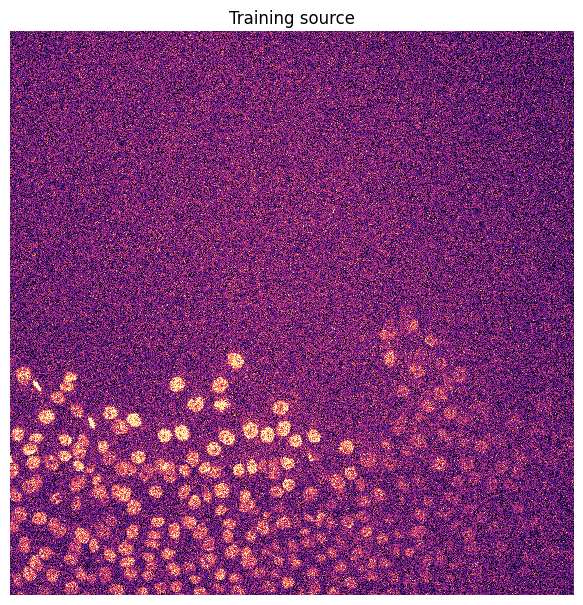

In [5]:
# create DataGenerator-object.

datagen = N2V_DataGenerator()

#@markdown ###Path to training image(s):
Training_source = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Training/low" #@param {type:"string"}

#compatibility to easily change the name of the parameters
training_images = Training_source
imgs = datagen.load_imgs_from_directory(directory = Training_source)

#@markdown ### Model name and path:
model_name = "n2v2d" #@param {type:"string"}
model_path = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Model/" #@param {type:"string"}

full_model_path = model_path+'/'+model_name+'/'

#@markdown ###Training Parameters
#@markdown Number of epochs:
number_of_epochs =  30#@param {type:"number"}

#@markdown Patch size (pixels)
patch_size =  64#@param {type:"number"}

#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True#@param {type:"boolean"}

#@markdown ###If not, please input:
batch_size =  128#@param {type:"number"}
number_of_steps = 0#@param {type:"number"}
percentage_validation =  10#@param {type:"number"}
initial_learning_rate = 0.0004 #@param {type:"number"}


if (Use_Default_Advanced_Parameters):
  print("Default advanced parameters enabled")
  # number_of_steps is defined in the following cell in this case
  batch_size = 128
  percentage_validation = 10
  initial_learning_rate = 0.0004


#here we check that no model with the same name already exist, if so print a warning

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3"+W)


# This will open a randomly chosen dataset input image
random_choice = random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)

# Here we check that the input images contains the expected dimensions
if len(x.shape) == 2:
  print("Image dimensions (y,x)",x.shape)

if not len(x.shape) == 2:
  print(bcolors.WARNING +"Your images appear to have the wrong dimensions. Image dimension",x.shape)


#Find image XY dimension
Image_Y = x.shape[0]
Image_X = x.shape[1]

#Hyperparameters failsafes

# Here we check that patch_size is smaller than the smallest xy dimension of the image
if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is divisible by 8
if not patch_size % 8 == 0:
    patch_size = ((int(patch_size / 8)-1) * 8)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is now:",patch_size)

# Here we disable pre-trained model by default (in case the next cell is not run)
Use_pretrained_model = False

# Here we enable data augmentation by default (in case the cell is not ran)
Use_Data_augmentation = True

print("Parameters initiated.")

#Here we display one image
norm = simple_norm(x, percent = 99)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest', norm=norm, cmap='magma')
plt.title('Training source')
plt.axis('off');
plt.savefig('/content/TrainingDataExample_N2V2D.png',bbox_inches='tight',pad_inches=0)


## **3.2. Data augmentation**
---

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4>Data augmentation is performed here by rotating the patches in XY-Plane and flip them along X-Axis. This only works if the patches are square in XY.

<font size = 4> **By default data augmentation is enabled. Disable this option is you run out of RAM during the training**.


In [6]:
#Data augmentation

#@markdown ##Play this cell to enable or disable data augmentation:

Use_Data_augmentation = False #@param {type:"boolean"}

if Use_Data_augmentation:
  print("Data augmentation enabled")

if not Use_Data_augmentation:
  print("Data augmentation disabled")

Data augmentation disabled



## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a N2V 2D model**.

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used.

In [7]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]

Weights_choice = "best" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")


# --------------------- Download the a model provided in the XXX ------------------------

  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the 2D_Demo_Model_from_Stardist_2D_paper")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled,
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_last.h5 pretrained model does not exist')
    Use_pretrained_model = False


# If the model path contains a pretrain model, we load the training rate,
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)

        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained nerwork will be used.')



No pretrained nerwork will be used.


# **4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
Generated patches: (256, 64, 64, 1)
5120 patches created.
512 patch images for validation ( 10 %).
4608 patch images for training.
peak memory: 1654.05 MiB, increment: 0.02 MiB
Setup done.
N2VConfig(means=['617.42'], stds=['318.19193'], n_dim=2, axes='YXC', n_channel_in=1, n_channel_out=1, unet_residual=False, unet

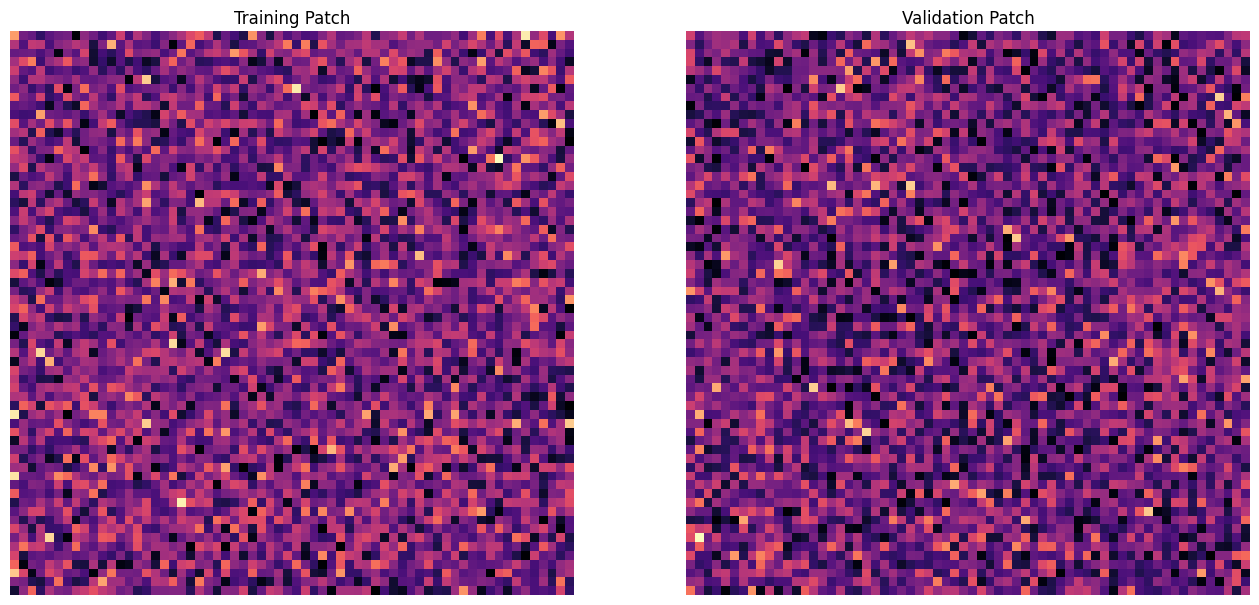

In [8]:
#@markdown ##Create the model and dataset objects

# --------------------- Here we delete the model folder if it already exist ------------------------

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: Model folder already exists and has been removed !!" + W)
  shutil.rmtree(model_path+'/'+model_name)


# split patches from the training images
Xdata = datagen.generate_patches_from_list(imgs, shape=(patch_size,patch_size), augment=Use_Data_augmentation)
shape_of_Xdata = Xdata.shape
# create a threshold (10 % patches for the validation)
threshold = int(shape_of_Xdata[0]*(percentage_validation/100))
# split the patches into training patches and validation patches
X = Xdata[threshold:]
X_val = Xdata[:threshold]
print(Xdata.shape[0],"patches created.")
print(threshold,"patch images for validation (",percentage_validation,"%).")
print(Xdata.shape[0]-threshold,"patch images for training.")
%memit

#Here we automatically define number_of_step in function of training data and batch size
if (Use_Default_Advanced_Parameters):
  number_of_steps= int(X.shape[0]/batch_size)+1


# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":
    initial_learning_rate = bestLearningRate
# --------------------- ---------------------- ------------------------

# create a Config object
config = N2VConfig(X, unet_kern_size=3,
                   train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs,
                   train_loss='mse', batch_norm=True, train_batch_size=batch_size, n2v_perc_pix=0.198,
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, train_learning_rate = initial_learning_rate)

# Let's look at the parameters stored in the config-object.
vars(config)


# create network model.
model = N2V(config=config, name=model_name, basedir=model_path)

# --------------------- Using pretrained model ------------------------
# Load the pretrained weights
if Use_pretrained_model:
  model.load_weights(h5_file_path)
# --------------------- ---------------------- ------------------------


print("Setup done.")
print(config)


# creates a plot and shows one training patch and one validation patch.
plt.figure(figsize=(16,87))
plt.subplot(1,2,1)
plt.imshow(X[0,...,0], cmap='magma')
plt.axis('off')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...,0], cmap='magma')
plt.axis('off')
plt.title('Validation Patch');

pdf_export(pretrained_model = Use_pretrained_model)

## **4.2. Start Training**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this
point.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder from Google Drive as all data can be erased at the next training if using the same folder.




In [9]:
start = time.time()

#@markdown ##Start training
%memit

history = model.train(X, X_val)
print("Training done.")
%memit


print("Training, done.")

# convert the history.history dict to a pandas DataFrame:
lossData = pd.DataFrame(history.history)

if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

os.makedirs(model_path+"/"+model_name+"/Quality Control")

# The training evaluation.csv is saved (overwrites the Files if needed).
lossDataCSVpath = model_path+'/'+model_name+'/Quality Control/training_evaluation.csv'
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60)
hour, mins = divmod(mins, 60)
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

model.export_TF(name='Noise2Void',
                description='Noise2Void 2D trained using ZeroCostDL4Mic.',
                authors=["You"],
                test_img=X_val[0,...,0], axes='YX',
                patch_shape=(patch_size, patch_size))

print("Your model has been sucessfully exported and can now also be used in the CSBdeep Fiji plugin")

pdf_export(trained = True, pretrained_model = Use_pretrained_model)

peak memory: 1674.85 MiB, increment: 0.00 MiB
8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 512/512 [00:00<00:00, 1827.91it/s]


Epoch 1/30
 6/37 [===>..........................] - ETA: 4s - loss: 1.2095 - n2v_mse: 1.2095 - n2v_abs: 0.8654

37/37 [==============================] - 29s 183ms/step - loss: 0.9865 - n2v_mse: 0.9865 - n2v_abs: 0.7906 - val_loss: 0.8454 - val_n2v_mse: 0.8454 - val_n2v_abs: 0.7366 - lr: 4.0000e-04
Epoch 2/30
37/37 [==============================] - 4s 119ms/step - loss: 0.8917 - n2v_mse: 0.8917 - n2v_abs: 0.7344 - val_loss: 0.8260 - val_n2v_mse: 0.8260 - val_n2v_abs: 0.7251 - lr: 4.0000e-04
Epoch 3/30
37/37 [==============================] - 4s 115ms/step - loss: 0.8058 - n2v_mse: 0.8058 - n2v_abs: 0.7247 - val_loss: 0.8386 - val_n2v_mse: 0.8386 - val_n2v_abs: 0.7260 - lr: 4.0000e-04
Epoch 4/30
37/37 [==============================] - 7s 200ms/step - loss: 0.8044 - n2v_mse: 0.8044 - n2v_abs: 0.7250 - val_loss: 0.8233 - val_n2v_mse: 0.8233 - val_n2v_abs: 0.7212 - lr: 4.0000e-04
Epoch 5/30
37/37 [==============================] - 4s 118ms/step - loss: 0.7958 - n2v_mse: 0.7958 - n2v_abs: 0.7217 - val_loss: 0.8124 - val_n2v_mse: 0.8124 - val_n2v_abs: 0.7200 - lr: 4.0000e-04
Epoch 6/30
37/37 [=======

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.



Model exported in BioImage ModelZoo format:
/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/n2v2d/export.bioimage.io.zip
Your model has been sucessfully exported and can now also be used in the CSBdeep Fiji plugin


# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model.

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [24]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Model/n2v2d" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model):
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:

  print(bcolors.WARNING + '!! WARNING: The chosen model does not exist !!')
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The n2v2d network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact noise patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

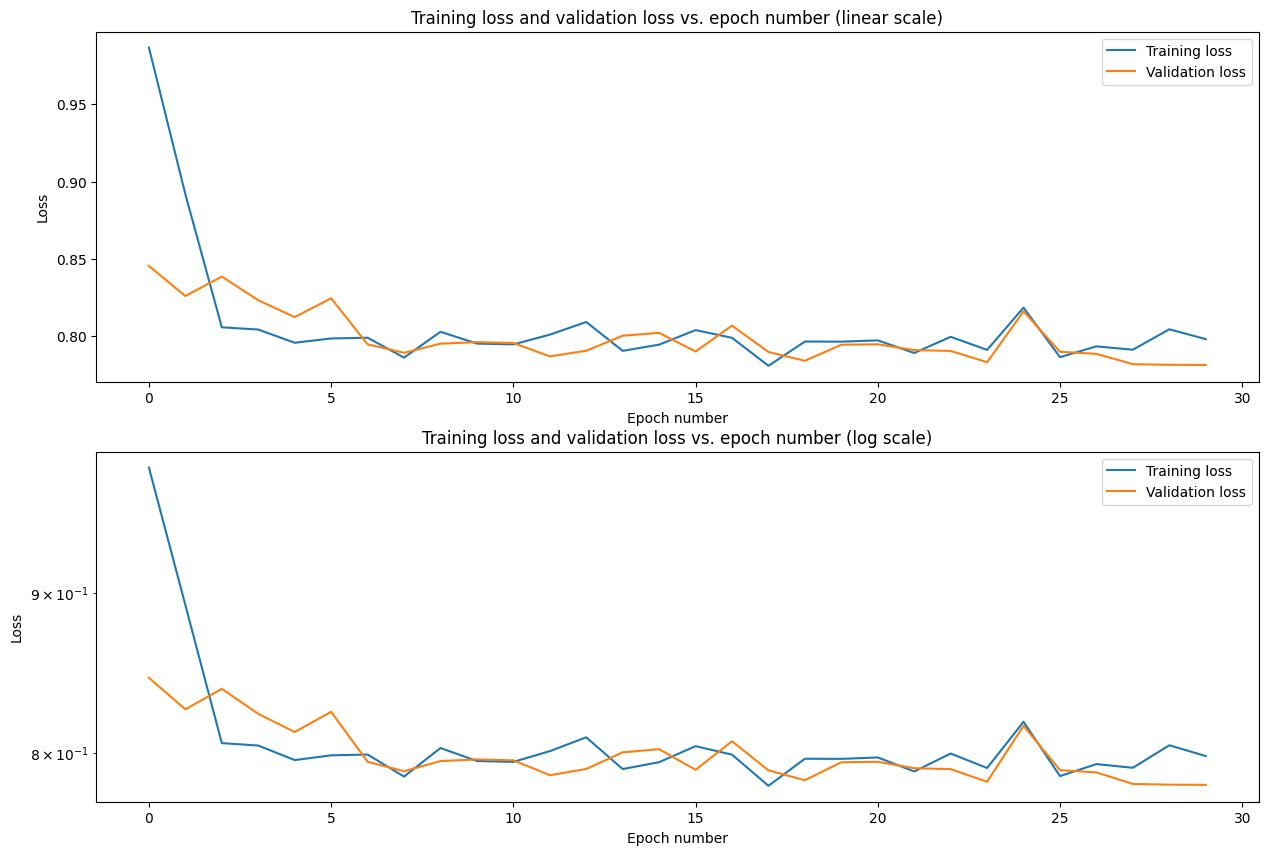

In [25]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png')
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---

<font size = 4>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "Source_QC_folder" and "Target_QC_folder" !

<font size = 4>**1. The SSIM (structural similarity) map**

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info).

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map**

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**


Loading network weights from 'weights_best.h5'.
Number of test dataset found in the folder: 2
The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 234ms/step


 50%|█████     | 1/2 [00:00<00:00, 45590.26it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 2/2 [00:00<00:00, 16.05it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 32ms/step


 50%|█████     | 1/2 [00:00<00:00, 49932.19it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 2/2 [00:00<00:00, 13.19it/s]


Running QC on: image2.tif
Running QC on: image1.tif


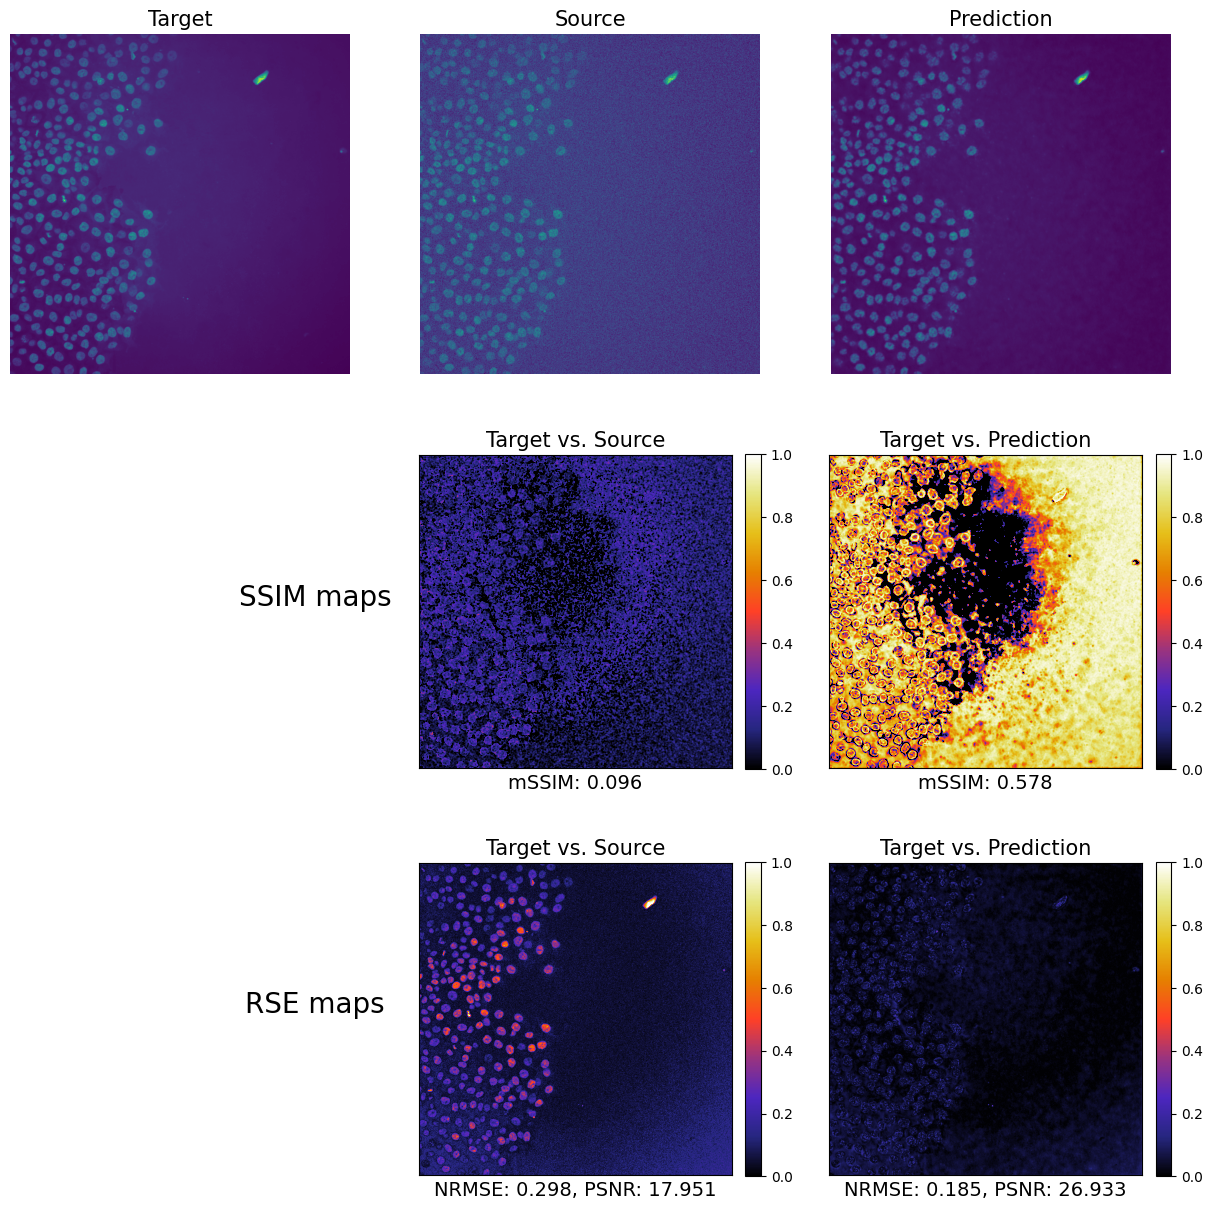

In [26]:
#@markdown ##Choose the folders that contain your Quality Control dataset

Source_QC_folder = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Quality Control Dataset/source" #@param{type:"string"}
Target_QC_folder = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Quality Control Dataset/target" #@param{type:"string"}

# Create a quality control/Prediction Folder
if os.path.exists("/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/Prediction"):
  shutil.rmtree("/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/Prediction")

os.makedirs("/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/Prediction")

# Activate the pretrained model.
model_training = N2V(config=None, name=QC_model_name, basedir="/content/gdrive/MyDrive/P2N_2023//Denoising_Dataset/Model")


# List Tif images in Source_QC_folder
Source_QC_folder_tif = Source_QC_folder+"/*.tif"
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))

print('Number of test dataset found in the folder: '+str(len(Z)))


# Perform prediction on all datasets in the Source_QC folder
for filename in os.listdir(Source_QC_folder):
  img = imread(os.path.join(Source_QC_folder, filename))
  predicted = model_training.predict(img, axes='YX', n_tiles=(2,1))
  os.chdir("/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/Prediction")
  imsave(filename, predicted)

def ssim(img1, img2):
  return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized

    Parameters
    ----------
    gt: ndarray
        the ground truth image
    x: ndarray
        the image that will be affinely scaled
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x

# Open and create the csv file that will contain all the QC metrics
with open( "/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/"+"QC_metrics_"+QC_model_name+".csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR"])

    # Let's loop through the provided dataset in the QC folders


    for i in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder,i)):
        print('Running QC on: '+i)
      # -------------------------------- Target test data (Ground truth) --------------------------------
        test_GT = io.imread(os.path.join(Target_QC_folder, i))

      # -------------------------------- Source test data --------------------------------
        test_source = io.imread(os.path.join(Source_QC_folder,i))

      # Normalize the images wrt each other by minimizing the MSE between GT and Source image
        test_GT_norm,test_source_norm = norm_minmse(test_GT, test_source, normalize_gt=True)

      # -------------------------------- Prediction --------------------------------
        test_prediction = io.imread(os.path.join("/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/Prediction",i))

      # Normalize the images wrt each other by minimizing the MSE between GT and prediction
        test_GT_norm,test_prediction_norm = norm_minmse(test_GT, test_prediction, normalize_gt=True)


      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM maps
        index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT_norm, test_prediction_norm)
        index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT_norm, test_source_norm)

      #Save ssim_maps
        img_SSIM_GTvsPrediction_32bit = np.float32(img_SSIM_GTvsPrediction)
        io.imsave('/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/'+'SSIM_GTvsPrediction_'+i,img_SSIM_GTvsPrediction_32bit)
        img_SSIM_GTvsSource_32bit = np.float32(img_SSIM_GTvsSource)
        io.imsave('/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/'+'SSIM_GTvsSource_'+i,img_SSIM_GTvsSource_32bit)

      # Calculate the Root Squared Error (RSE) maps
        img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
        img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

      # Save SE maps
        img_RSE_GTvsPrediction_32bit = np.float32(img_RSE_GTvsPrediction)
        img_RSE_GTvsSource_32bit = np.float32(img_RSE_GTvsSource)
        io.imsave('/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/'+'RSE_GTvsPrediction_'+i,img_RSE_GTvsPrediction_32bit)
        io.imsave('/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/'+'RSE_GTvsSource_'+i,img_RSE_GTvsSource_32bit)


      # -------------------------------- Calculate the RSE metrics and save them --------------------------------

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
        NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))

      # We can also measure the peak signal to noise ratio between the images
        PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
        PSNR_GTvsSource = psnr(test_GT_norm,test_source_norm,data_range=1.0)

        writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource),str(PSNR_GTvsPrediction),str(PSNR_GTvsSource)])


# All data is now processed saved
Test_FileList = os.listdir(Source_QC_folder) # this assumes, as it should, that both source and target are named the same

plt.figure(figsize=(15,15))
# Currently only displays the last computed set, from memory
# Target (Ground-truth)
plt.subplot(3,3,1)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))
plt.imshow(img_GT)
plt.title('Target',fontsize=15)

# Source
plt.subplot(3,3,2)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source)
plt.title('Source',fontsize=15)

#Prediction
plt.subplot(3,3,3)
plt.axis('off')
img_Prediction = io.imread(os.path.join("/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/Prediction", Test_FileList[-1]))
plt.imshow(img_Prediction)
plt.title('Prediction',fontsize=15)

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between GT and Source
plt.subplot(3,3,5)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#SSIM between GT and Prediction
plt.subplot(3,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)

#Root Squared Error between GT and Source
plt.subplot(3,3,8)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)
plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsSource,3))+', PSNR: '+str(round(PSNR_GTvsSource,3)),fontsize=14)
#plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

#Root Squared Error between GT and Prediction
plt.subplot(3,3,9)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)
imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)
plt.savefig('/content/gdrive/MyDrive/P2N_2023/Model/n2v2d/Quality Control/'+'QC_example_data.png',bbox_inches='tight',pad_inches=0)

#qc_pdf_export()

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If an older model needs to be used, please untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contains the images that you want to predict using the network that you will train.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

<font size = 4>**`Data_type`:** Please indicate if the images you want to predict are single images or stacks

In [29]:
Single_Images = 1
Stacks = 2

#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved, then play the cell to predict output on your unseen images.

#@markdown ###Path to data to analyse and where predicted output should be saved:
Data_folder = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/test/Low" #@param {type:"string"}
Result_folder = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Prediction_testset" #@param {type:"string"}

#@markdown ###Are your data single images or stacks?

Data_type = Single_Images #@param ["Single_Images", "Stacks"] {type:"raw"}

# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Model/n2v2d" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

if (Use_the_current_trained_model):
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  print(bcolors.WARNING +'!! WARNING: The chosen model does not exist !!')
  print('Please make sure you provide a valid model path and model name before proceeding further.')


#Activate the pretrained model.
config = None
model = N2V(config, Prediction_model_name, basedir=Prediction_model_path)

thisdir = Path(Data_folder)
outputdir = Path(Result_folder)

  # r=root, d=directories, f = files
for r, d, f in os.walk(thisdir):
    for file in f:
        if ".tif" in file:
            print(os.path.join(r, file))

if Data_type == 1 :
  print("Single images are now beeing predicted")

# Loop through the files
  for r, d, f in os.walk(thisdir):
    for file in f:
      base_filename = os.path.basename(file)
      input_train = imread(os.path.join(r, file))
      pred_train = model.predict(input_train, axes='YX', n_tiles=(2,1))
      save_tiff_imagej_compatible(os.path.join(outputdir, base_filename), pred_train, axes='YX')

  print("Images saved into folder:", Result_folder)

if Data_type == 2 :
  print("Stacks are now beeing predicted")
  for r, d, f in os.walk(thisdir):
    for file in f:
      base_filename = os.path.basename(file)
      timelapse = imread(os.path.join(r, file))
      n_timepoint = timelapse.shape[0]
      prediction_stack = np.zeros((n_timepoint, timelapse.shape[1], timelapse.shape[2]))

      for t in range(n_timepoint):
        img_t = timelapse[t]
        prediction_stack[t] = model.predict(img_t, axes='YX', n_tiles=(2,1))

      prediction_stack_32 = img_as_float32(prediction_stack, force_copy=False)
      imsave(os.path.join(outputdir, base_filename), prediction_stack_32)






The n2v2d network will be used.
Loading network weights from 'weights_best.h5'.
/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/test/Low/cell migration high and low - Position 1 - 1_XY1562738053_Z0.tif
/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/test/Low/cell migration high and low - Position 0_XY1562737767_Z0_T0_.tif
/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/test/Low/cell migration high and low - Position 1_XY1562737768_Z0_T0_.tif
/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/test/Low/cell migration high and low - Position 2 - 1_XY1562738054_Z0.tif
/content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/test/Low/cell migration high and low - Position 0 - 1_XY1562738052_Z0.tif
Single images are now beeing predicted
The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 250ms/step


 50%|█████     | 1/2 [00:00<00:00, 624.62it/s]

1/1 [==============================] - 0s 24ms/step


100%|██████████| 2/2 [00:00<00:00, 18.15it/s]


The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 22ms/step


 50%|█████     | 1/2 [00:00<00:00, 31068.92it/s]

1/1 [==============================] - 0s 25ms/step


100%|██████████| 2/2 [00:00<00:00, 17.96it/s]


The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 24ms/step


 50%|█████     | 1/2 [00:00<00:00, 45590.26it/s]

1/1 [==============================] - 0s 24ms/step


100%|██████████| 2/2 [00:00<00:00, 20.00it/s]


The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 34ms/step


 50%|█████     | 1/2 [00:00<00:00, 63550.06it/s]

1/1 [==============================] - 0s 30ms/step


100%|██████████| 2/2 [00:00<00:00, 13.15it/s]


The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 33ms/step


 50%|█████     | 1/2 [00:00<00:00, 57456.22it/s]

1/1 [==============================] - 0s 35ms/step


100%|██████████| 2/2 [00:00<00:00, 14.85it/s]

Images saved into folder: /content/gdrive/MyDrive/P2N_2023/Denoising_Dataset/Prediction_testset


## **6.2. Assess predicted output**
---




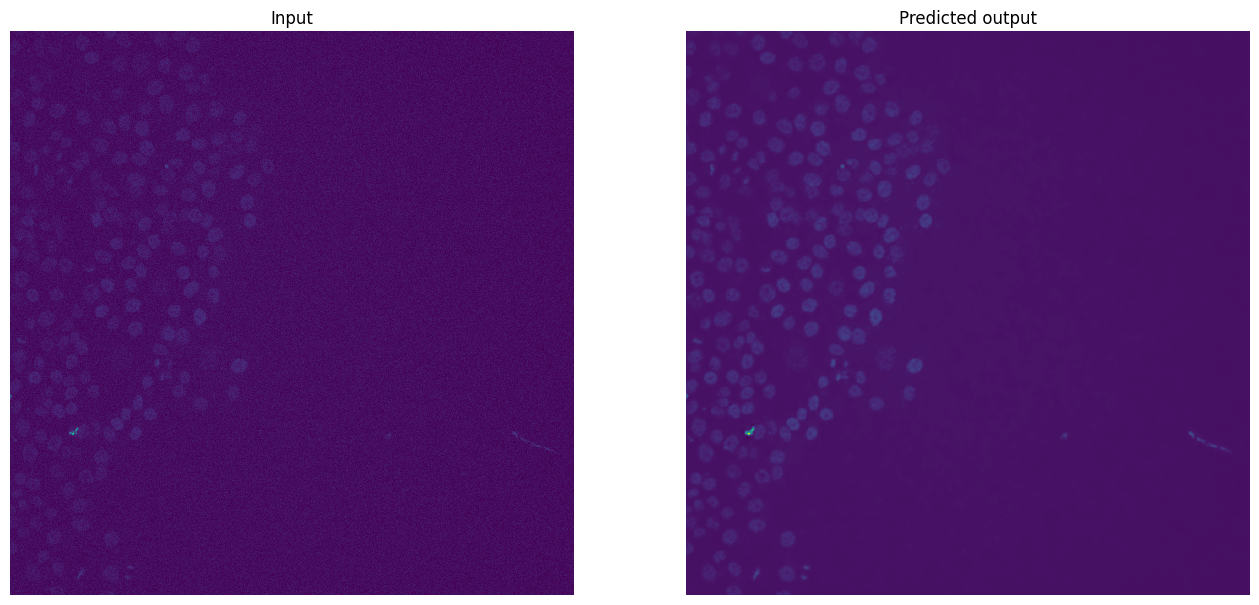

In [30]:
# @markdown ##Run this cell to display a randomly chosen input and its corresponding predicted output.

# This will display a randomly chosen dataset input and predicted output


random_choice = random.choice(os.listdir(Data_folder))
x = imread(Data_folder+"/"+random_choice)

os.chdir(Result_folder)
y = imread(Result_folder+"/"+random_choice)

if Data_type == 1 :

  f=plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.imshow(x, interpolation='nearest')
  plt.title('Input')
  plt.axis('off');
  plt.subplot(1,2,2)
  plt.imshow(y, interpolation='nearest')
  plt.title('Predicted output')
  plt.axis('off');

if Data_type == 2 :

  f=plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.imshow(x[1], interpolation='nearest')
  plt.title('Input')
  plt.axis('off');
  plt.subplot(1,2,2)
  plt.imshow(y[1], interpolation='nearest')
  plt.title('Predicted output')
  plt.axis('off');




## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.16**:
*   Now using latest version of TensorFlow

<font size = 4>**v1.15**:

*   TensorFlow version 2.5 to allow connect with Google Colab's GPU

#**Thank you for using Noise2Void 2D!**